In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

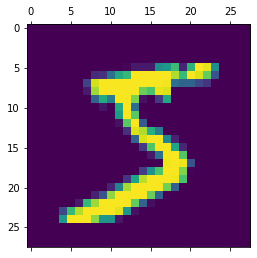

In [6]:
plt.matshow(X_train[0])

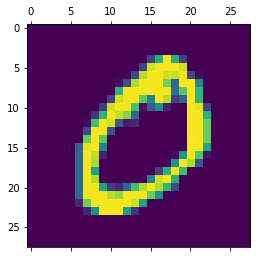

In [7]:
plt.matshow(X_train[1])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [13]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
#Accuracy_without_hidden_layer
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4685 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3046 - accuracy: 0.9154: 1s - l
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9261


Accuray is 92.52%

In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2706 - accuracy: 0.9231


[0.2705867886543274, 0.9230999946594238]

In [16]:
#Accuracy_with_hidden_layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1264 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0868 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0659 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0524 - accuracy: 0.9838


With hidden layer our accuracy score is improved to 98.40%

In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9738


[0.08801907300949097, 0.973800003528595]

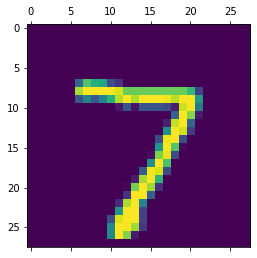

In [20]:
plt.matshow(X_test[0])

In [21]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

array([3.9131939e-02, 1.7098188e-03, 4.2103618e-01, 7.1679741e-01,
       3.8675877e-05, 7.2504252e-02, 4.1175731e-08, 9.9999839e-01,
       8.8883609e-02, 4.1416657e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
#confusion_matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    0,    1,    1,    3,    1,    0],
       [   0, 1121,    5,    0,    0,    1,    2,    1,    5,    0],
       [   5,    0, 1009,    1,    3,    0,    1,    9,    4,    0],
       [   0,    0,   11,  969,    1,   10,    0,   12,    3,    4],
       [   0,    0,    7,    0,  963,    0,    1,    6,    0,    5],
       [   4,    0,    0,    6,    1,  873,    2,    3,    2,    1],
       [   6,    2,    3,    1,    3,    5,  934,    1,    3,    0],
       [   0,    1,   15,    0,    0,    1,    0, 1007,    1,    3],
       [   7,    0,    8,    3,    6,    5,    3,    6,  932,    4],
       [   3,    3,    1,    5,   15,    4,    0,   19,    1,  958]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

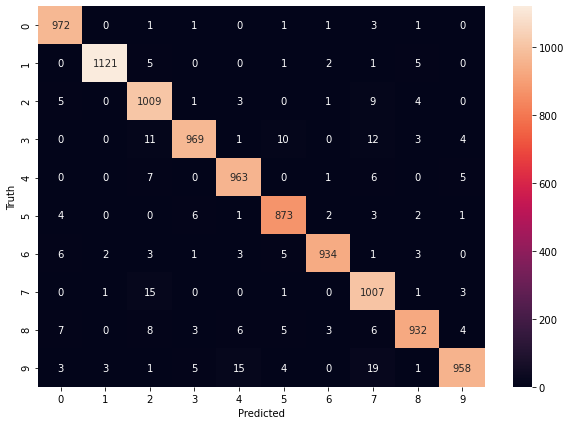

In [28]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')